In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages
import numpy as np
import xarray as xr
import xgcm
from matplotlib import pyplot as plt

import sectionate as sec
import regionate as reg

# Don't display filter warnings
import warnings
warnings.filterwarnings("ignore")

# Set figure font size
plt.rcParams.update({'font.size':12})

In [3]:
import matplotlib.pyplot as plt

def geoplot(ds, da, *args, **kwargs):
    pc = plt.pcolormesh(
        ds['geolon_c'],
        ds['geolat_c'],
        da,
        *args,
        **kwargs
    )
    return pc

## Applying `sectionate` and `regionmask` to look at heat flux into and out of the Caribbean

## 1. Load data

Here we load annual data on a $z^{*}$ (`zstr`) grid, but the same approach works for any vertical coordinate.

In [4]:
import momlevel as mom
import momgrid

In [5]:
hf_x_368 = xr.open_mfdataset("/archive/Olga.Sergienko/fre_om5/FMS2023.01_om5_20231122/om5_b03_standard_GEBCO_BMv3Ant/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_adx.nc")
#hf_x_368 = momgrid.geoslice.geoslice(hf_x_368, x=(-80,-60), y=(5,20))
#hf_x_368

In [6]:
hf_y_368 = xr.open_mfdataset("/archive/Olga.Sergienko/fre_om5/FMS2023.01_om5_20231122/om5_b03_standard_GEBCO_BMv3Ant/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.*.T_ady.nc")


In [7]:
hf_x_319 = xr.open_mfdataset("/archive/Xinru.Li/MHWs/odiv319/ocean_annual_z.*.T_adx.nc")


In [8]:
hf_y_319 = xr.open_mfdataset("/archive/Xinru.Li/MHWs/odiv319/ocean_annual_z.*.T_ady.nc")


In [9]:
# Here we load data on a (zstr) grid, but the same approach works for any vertical coordinate.
rootdir = '/archive/Olga.Sergienko/fre_om5/FMS2023.01_om5_20231122/om5_b03_standard_GEBCO_BMv3Ant/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/'
prefix = 'ocean_annual_z'

og_368 = xr.open_mfdataset(f"{rootdir}{prefix}.static.nc")
ds_368 = xr.Dataset() 

ds_368 = xr.merge([ds_368, hf_x_368])
ds_368 = xr.merge([ds_368, hf_y_368])

ds_368 = ds_368.assign_coords({
    'xq': xr.DataArray(og_368['xq'].values, dims=('xq',)),
    'yq': xr.DataArray(og_368['yq'].values, dims=('yq',)),
    'geolon': xr.DataArray(og_368['geolon'].values, dims=('yh','xh')),
    'geolat': xr.DataArray(og_368['geolat'].values, dims=('yh','xh')),
    'geolon_u': xr.DataArray(og_368['geolon_u'].values, dims=('yh','xq')),
    'geolat_u': xr.DataArray(og_368['geolat_u'].values, dims=('yh','xq')),
    'geolon_v': xr.DataArray(og_368['geolon_v'].values, dims=('yq','xh')),
    'geolat_v': xr.DataArray(og_368['geolat_v'].values, dims=('yq','xh')),
    'geolon_c': xr.DataArray(og_368['geolon_c'].values, dims=('yq','xq')),
    'geolat_c': xr.DataArray(og_368['geolat_c'].values, dims=('yq','xq')),
    'dxCv': xr.DataArray(og_368['dxCv'].values, dims=('yq', 'xh',)),
    'dyCu': xr.DataArray(og_368['dyCu'].values, dims=('yh', 'xq',)),
    'deptho': xr.DataArray(og_368['deptho'].values, dims=('yh', 'xh',)),
}) # add velocity face widths to calculate distances along the section


coords={
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'inner': 'z_l', 'outer': 'z_i'}
}
grid_368 = xgcm.Grid(ds_368, coords=coords, boundary={"X":"periodic", "Y":"periodic", "Z":"extend"}, autoparse_metadata=False)

# look for the heat content budget equation? 
rho0 = 1035. # kg/m^3 seawater density
Cp = 3992. # J/kg/K   specific heat capacity of seawater

In [10]:
# Here we load data on a (zstr) grid, but the same approach works for any vertical coordinate.
rootdir = '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230927/om5_b02_minthick1em3_MLErestart/gfdl.ncrc5-intel23-prod/pp/ocean_annual_z/'
prefix = 'ocean_annual_z'

og_319 = xr.open_mfdataset(f"{rootdir}{prefix}.static.nc")
ds_319 = xr.Dataset()  

ds_319 = xr.merge([ds_319, hf_x_319])
ds_319 = xr.merge([ds_319, hf_y_319])

ds_319 = ds_319.assign_coords({
    'xq': xr.DataArray(og_319['xq'].values, dims=('xq',)),
    'yq': xr.DataArray(og_319['yq'].values, dims=('yq',)),
    'geolon': xr.DataArray(og_319['geolon'].values, dims=('yh','xh')),
    'geolat': xr.DataArray(og_319['geolat'].values, dims=('yh','xh')),
    'geolon_u': xr.DataArray(og_319['geolon_u'].values, dims=('yh','xq')),
    'geolat_u': xr.DataArray(og_319['geolat_u'].values, dims=('yh','xq')),
    'geolon_v': xr.DataArray(og_319['geolon_v'].values, dims=('yq','xh')),
    'geolat_v': xr.DataArray(og_319['geolat_v'].values, dims=('yq','xh')),
    'geolon_c': xr.DataArray(og_319['geolon_c'].values, dims=('yq','xq')),
    'geolat_c': xr.DataArray(og_319['geolat_c'].values, dims=('yq','xq')),
    'dxCv': xr.DataArray(og_319['dxCv'].values, dims=('yq', 'xh',)),
    'dyCu': xr.DataArray(og_319['dyCu'].values, dims=('yh', 'xq',)),
    'deptho': xr.DataArray(og_319['deptho'].values, dims=('yh', 'xh',)),
}) # add velocity face widths to calculate distances along the section



coords={
    'X': {'center': 'xh', 'outer': 'xq'},
    'Y': {'center': 'yh', 'outer': 'yq'},
    'Z': {'inner': 'z_l', 'outer': 'z_i'}
}
grid_319 = xgcm.Grid(ds_319, coords=coords, boundary={"X":"periodic", "Y":"periodic", "Z":"extend"}, autoparse_metadata=False)

# look for the heat content budget equation? 
rho0 = 1035. # kg/m^3 seawater density
Cp = 3992. # J/kg/K   specific heat capacity of seawater

In [ ]:
ds_319

In [12]:
ds_319.geolon[0,:].values

array([-299.71835 , -299.47037 , -299.2224  , ...,   59.537766,
         59.78573 ,   60.03369 ], dtype=float32)

In [13]:
ds_319.geolat[:,0].values

array([-79.80674 , -79.743546, -79.68049 , ...,  64.11358 ,  64.11359 ,
        64.11359 ], dtype=float32)

In [18]:
ds_319.T_adx  # calculate time integral heat flux at the lesser Antilles

<xarray.DataArray 'T_adx' (time: 65, z_l: 35, yh: 1080, xq: 1441)>
dask.array<concatenate, shape=(65, 35, 1080, 1441), dtype=float32, chunksize=(5, 35, 1080, 1441), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 1958-07-02 12:00:00 ... 2022-07-02 12:00:00
  * yh        (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l       (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * xq        (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.91 60.16 60.16
    geolon_u  (yh, xq) float32 -299.6 -299.3 -299.1 -298.9 ... 60.0 60.0 nan
    geolat_u  (yh, xq) float32 -79.81 -79.8 -79.8 -79.8 ... 64.17 64.06 nan
    dyCu      (yh, xq) float32 7.044e+03 7.039e+03 7.034e+03 ... 0.1947 nan
Attributes:
    units:          W
    long_name:      Advective (by residual mean) Zonal Flux of Heat
    cell_methods:   z_l:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [ ]:
lons_368.shape

### 3.2. **Generalizing to any closed polygonal region, leveraging `sectionate`'s ability to find grid-conforming shortest paths**

In [27]:
grid_368   #grid.diff(T_adx, "X")

<xgcm.Grid>
X Axis (periodic, boundary='periodic'):
  * center   xh --> outer
  * outer    xq --> center
Y Axis (periodic, boundary='periodic'):
  * center   yh --> outer
  * outer    yq --> center
Z Axis (not periodic, boundary='extend'):
  * inner    z_l
  * outer    z_i

In [11]:
# generate region mask for the Lesser Antilles
lons_368 = np.array([-62., -60., -60., -62.])  # -63, -58
lats_368 = np.array([11.5, 11.5, 18.5, 18.5])
region_368 = reg.GriddedRegion("Lesser Antilles", lons_368, lats_368, grid_368)

In [26]:
og_368['areacello']

<xarray.DataArray 'areacello' (yh: 1161, xh: 1440)>
dask.array<open_dataset-areacello, shape=(1161, 1440), dtype=float32, chunksize=(1161, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.9 -299.6 -299.4 -299.1 ... 59.38 59.62 59.88
  * yh       (yh) float64 -88.52 -88.42 -88.32 -88.23 ... 89.73 89.84 89.95
Attributes:
    units:          m2
    long_name:      Ocean Grid-Cell Area
    cell_methods:   area:sum yh:sum xh:sum time: point
    standard_name:  cell_area

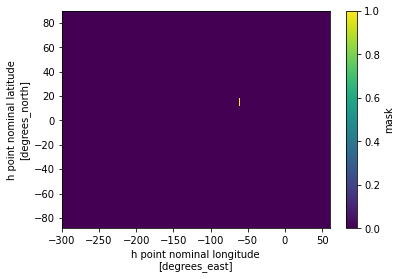

In [12]:
region_368.mask.plot()

In [23]:
region_368.mask.dims

('yh', 'xh')

In [24]:
T_adx_368_tmds.dims

('yh', 'xq')

In [19]:
# From normal-surface integral of diagnosed horizontal heat fluxes
T_adx_368_tmds = ds_368.T_adx.mean("time").sum('z_l')
T_adx_368_tmds = T_adx_368_tmds.where(T_adx_368_tmds!=0.)

In [21]:
T_adx_368_tmds.where(region_368.mask)

<xarray.DataArray 'T_adx' (yh: 1161, xq: 1441, xh: 1440)>
dask.array<where, shape=(1161, 1441, 1440), dtype=float32, chunksize=(1161, 1441, 1440), chunktype=numpy.ndarray>
Coordinates:
  * yh        (yh) float64 -88.52 -88.42 -88.32 -88.23 ... 89.73 89.84 89.95
  * xq        (xq) float64 -300.0 -299.8 -299.5 -299.2 ... 59.25 59.5 59.75 60.0
    geolon_u  (yh, xq) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    geolat_u  (yh, xq) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    dyCu      (yh, xq) float32 nan nan nan nan nan nan ... nan nan nan nan nan
  * xh        (xh) float64 -299.9 -299.6 -299.4 -299.1 ... 59.38 59.62 59.88
    geolon    (yh, xh) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    geolat    (yh, xh) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    deptho    (yh, xh) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [20]:
T_adx_368_tmds.shape

(1161, 1441)

In [25]:
og_368.deptho.dims

('yh', 'xh')

In [ ]:
# subset data for plot otherwise too small to see and too large data volume hitting ram limit locally


MemoryError: Unable to allocate 1.53 TiB for an array with shape (5, 35, 1161, 1441, 1440) and data type float32

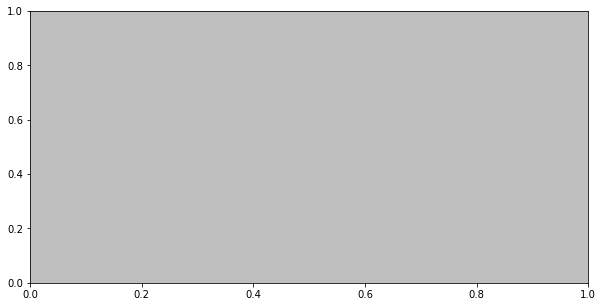

In [13]:
# 

plt.figure(figsize=(10, 5))
plt.subplot(facecolor=(0.75, 0.75, 0.75))
pc = geoplot(
    ds_368,
    T_adx_368_tmds*1e-9,   # convert unit: W to GW
    alpha=1.0, cmap="RdBu_r"#, vmin=-2e1, vmax=2e1
)
depth_cmap = plt.get_cmap("viridis_r").copy()
pc_dep = geoplot(ds_368, og_368.deptho.where(~region_368.mask), cmap=depth_cmap)
plt.plot(lons_368, lats_368, "C3o", markersize=5, label="User-input boundary points (not necessarily on grid)")
plt.plot([],[],"k.",label="Boundary defined by grid cell corners")
plt.plot(reg.loop(region_368.lons), reg.loop(region_368.lats), "k-", linewidth=0.5, label="Consecutive velocity faces that approximate the boundary")
plt.plot(region_368.lons_uv, region_368.lats_uv, "k+", markersize=2.)
plt.colorbar(pc_dep, label="depth [m]")
plt.colorbar(pc, label="column heat tendency [GW]")
plt.legend(loc = "upper left", fontsize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()



### heat flux at each depth

In [31]:
heat_flux_x = hf_y_319['T_ady']
heat_flux_x  = heat_flux_x.where(heat_flux_x!=0.) 

In [34]:
og.depth_ocean.where(~region_368.mask)

NameError: name 'og' is not defined

In [35]:
heat_flux_x.where(region.mask).shape

(65, 35, 1081, 0, 105)

### advective heat convergence

In [33]:
heat_flux_x_sum = (hf_y_319['T_ady']).sum('z_l')
heat_flux_x_sum  = heat_flux_x_sum .where(dheatdt_dynamics!=0.)

# From volume integral of horizontal advective tendencies
advective_heating = dheatdt_dynamics.where(region.mask).sum(['xh', 'yh']).values # LHS

# From normal-surface integral of diagnosed horizontal heat fluxes
convergent_heat_transport = sec.convergent_transport(
    grid,
    region.i,
    region.j,
    utr="T_adx",
    vtr="T_ady",
    layer="z_l",
    interface="z_i",
    outname="conv_heat_transport"
)['conv_heat_transport'].sum(["z_l", "sect"]).compute()

plt.figure(figsize=(10, 5))
plt.subplot(facecolor=(0.75, 0.75, 0.75))
pc = geoplot(
    ds,
    dheatdt_dynamics.where(region.mask)*1e-9,
    alpha=1.0, cmap="RdBu_r", vmin=-2e1, vmax=2e1
)
depth_cmap = plt.get_cmap("viridis_r").copy()
pc_dep = geoplot(ds, og.depth_ocean.where(~region.mask), cmap=depth_cmap)
plt.plot(lons, lats, "C3o", markersize=5, label="User-input boundary points (not necessarily on grid)")
plt.plot([],[],"k.",label="Boundary defined by grid cell corners")
plt.plot(reg.loop(region.lons), reg.loop(region.lats), "k-", linewidth=0.5, label="Consecutive velocity faces that approximate the boundary")
plt.plot(region.lons_uv, region.lats_uv, "k+", markersize=2.)
plt.colorbar(pc_dep, label="depth [m]")
plt.colorbar(pc, label="column heat tendency [GW]")
plt.legend(loc = "upper left", fontsize=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.tight_layout()

if np.isclose(advective_heating.sum(), convergent_heat_transport.values, rtol=1.e-5):
    print(
    """
    We have verified that the convergent heat flux across the region's boundary
    is equal (within float32 precision) to the volume integral within the region.
    """
    )
else:
    print("We have no been able to reconcile boundary-normal fluxes with the volume integral.")

NameError: name 'dheatdt_dynamics' is not defined

In [12]:
# From volume integral of horizontal advective tendencies
advective_heating = dheatdt_dynamics.where(region.mask).sum(['xh', 'yh']).values # LHS

# From normal-surface integral of diagnosed horizontal heat fluxes
convergent_heat_transport = sec.convergent_transport(
    grid,
    region.i,
    region.j,
    utr="T_adx",
    vtr="T_ady",
    layer="z_l",
    interface="z_i",
    outname="conv_heat_transport"
)['conv_heat_transport']

cumulative_convergent_heat_transport = (
    convergent_heat_transport
    .cumsum("sect").sel(z_l=ds.z_l[::-1])
    .cumsum('z_l').sel(z_l=ds.z_l[::-1])
).compute()

net_convergent_heat_transport = cumulative_convergent_heat_transport.isel(sect=-1, z_l=-1).values

print(f"Verify divergence theorem: {np.isclose(net_convergent_heat_transport, advective_heating, rtol=1.e-5, atol=0.)}")

Verify divergence theorem: True


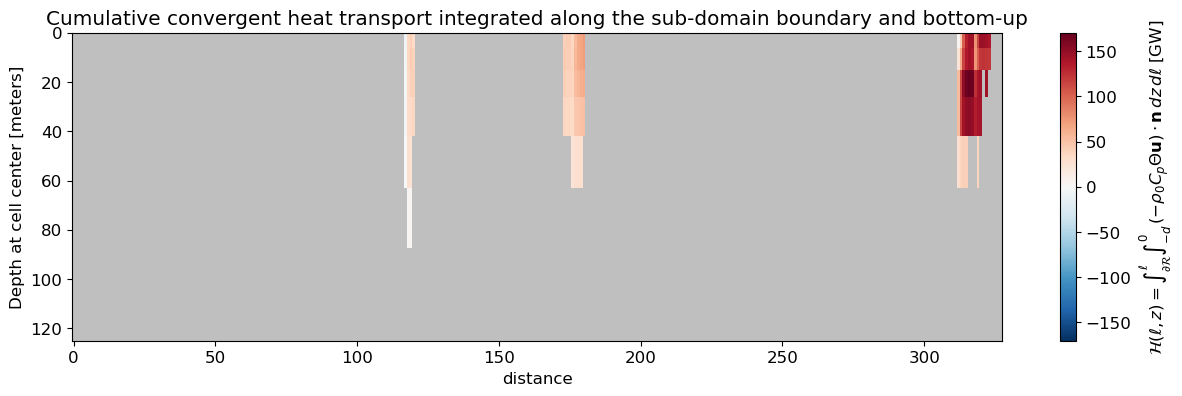

In [13]:
cmap = plt.get_cmap("RdBu_r").copy()
cmap.set_bad((0.75, 0.75, 0.75))
plt.figure(figsize=(15, 4))
da_plot = (
    (cumulative_convergent_heat_transport*1e-9)
    .where(convergent_heat_transport!=0.)
    .swap_dims({'sect':'distance'})
)
pc = da_plot.plot(x="distance", cmap=cmap)

plt.ylim(125, 0)
plt.title("Cumulative convergent heat transport integrated along the sub-domain boundary and bottom-up")
pc.colorbar.set_label(r"$\mathcal{H}(\ell, z) = \int_{\partial \mathcal{R}}^{\ell} \int_{-d}^{0} \, (- \rho_{0} C_{p} \Theta \mathbf{u})  \cdot \mathbf{n} \,dz\,d\ell$ [GW]")